In [1]:
# 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rc('font',family='Malgun Gothic') # 한글 폰트 지정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


In [3]:
df1= pd.read_excel('crimelist.xlsx')
df1
# 엑셀 파일을 df1형태로 불러옴

,범죄대분류,범죄중분류,발생건수,발생비 (건/10만명),검거건수,발생건수대비 검거건수 (%),검거인원,남자검거인원,여자검거인원 (명),미상검거인원
0,재산범죄,절도,173650,335,106049,61.1,95492,69416,25558,518
1,재산범죄,불법사용,832,1.6,645,77.5,1134,1066,68,-
2,재산범죄,침입절도,5585,10.8,4962,88.8,2806,2583,218,5
3,재산범죄,장물,616,1.2,587,95.3,1108,902,188,18
4,재산범죄,사기,340925,657.8,234065,68.7,240531,183046,52520,4965
...,...,...,...,...,...,...,...,...,...,...
74,과실범죄,과실치상,2846,5.5,2472,86.9,2836,1799,1014,23
75,과실범죄,과실치사,37,0.1,36,97.3,55,39,12,4
76,과실범죄,업무상과실치상,2491,4.8,2381,95.6,3781,3024,676,81
77,과실범죄,업무상과실치사,1113,2.1,1079,96.9,2185,1843,301,41


In [4]:
df1['범죄대분류'].unique()
df1.groupby(['범죄대분류']).count()
# 형식 = 데이터명.groupby('기준 컬럼'). 기술통계함수()
# 같은 '기준 컬럼'별로 통계량 출력

,범죄중분류,발생건수,발생비 (건/10만명),검거건수,발생건수대비 검거건수 (%),검거인원,남자검거인원,여자검거인원 (명),미상검거인원
범죄대분류,,,,,,,,,
강력범죄(폭력),19,19,19,19,19,19,19,19,19
강력범죄(흉악),26,26,26,26,26,26,26,26,26
공무원범죄,4,4,4,4,4,4,4,4,4
과실범죄,5,5,5,5,5,5,5,5,5
위조범죄,4,4,4,4,4,4,4,4,4
재산범죄,17,17,17,17,17,17,17,17,17
풍속범죄,4,4,4,4,4,4,4,4,4


In [5]:
df1.info()
# 기존 엑셀 정보를 불러왔을때 Dtype이 int가 아닌 object로 설정되어있어 계산 및 시각화가 불가함을 알게됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            79 non-null     object
 1   범죄중분류            79 non-null     object
 2   발생건수             79 non-null     object
 3   발생비 (건/10만명)     79 non-null     object
 4   검거건수             79 non-null     object
 5   발생건수대비 검거건수 (%)  79 non-null     object
 6   검거인원             79 non-null     object
 7   남자검거인원           79 non-null     object
 8   여자검거인원 (명)       79 non-null     object
 9   미상검거인원           79 non-null     object
dtypes: object(10)
memory usage: 6.3+ KB


In [6]:
df2 = df1.replace('-', '0')
df2.head()
# 기존데이터에 0이 '-' 형태로 표기되어있어 프로그램이 object로 인식하는 것 같아 '-'을 전부 0으로 변경하는 수식을 대입함.

,범죄대분류,범죄중분류,발생건수,발생비 (건/10만명),검거건수,발생건수대비 검거건수 (%),검거인원,남자검거인원,여자검거인원 (명),미상검거인원
0,재산범죄,절도,173650,335,106049,61.1,95492,69416,25558,518
1,재산범죄,불법사용,832,1.6,645,77.5,1134,1066,68,0
2,재산범죄,침입절도,5585,10.8,4962,88.8,2806,2583,218,5
3,재산범죄,장물,616,1.2,587,95.3,1108,902,188,18
4,재산범죄,사기,340925,657.8,234065,68.7,240531,183046,52520,4965


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            79 non-null     object
 1   범죄중분류            79 non-null     object
 2   발생건수             79 non-null     object
 3   발생비 (건/10만명)     79 non-null     object
 4   검거건수             79 non-null     object
 5   발생건수대비 검거건수 (%)  79 non-null     object
 6   검거인원             79 non-null     object
 7   남자검거인원           79 non-null     object
 8   여자검거인원 (명)       79 non-null     object
 9   미상검거인원           79 non-null     object
dtypes: object(10)
memory usage: 6.3+ KB


In [8]:
# 'Dtype'이 'int' 로 바뀌지 않고 여전히 'object'임을 확인하고 변경을 위한 수식을 입력
df2 = df2.astype({'발생건수':'int'})
df2 = df2.astype({'발생비 (건/10만명)':'int'})
df2 = df2.astype({'검거건수':'int'})
df2 = df2.astype({'발생건수대비 검거건수 (%)':'int'})
df2 = df2.astype({'검거인원':'int'})
df2 = df2.astype({'남자검거인원':'int'})
df2 = df2.astype({'여자검거인원 (명)':'int'})
df2 = df2.astype({'미상검거인원':'int'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            79 non-null     object
 1   범죄중분류            79 non-null     object
 2   발생건수             79 non-null     int32 
 3   발생비 (건/10만명)     79 non-null     int32 
 4   검거건수             79 non-null     int32 
 5   발생건수대비 검거건수 (%)  79 non-null     int32 
 6   검거인원             79 non-null     int32 
 7   남자검거인원           79 non-null     int32 
 8   여자검거인원 (명)       79 non-null     int32 
 9   미상검거인원           79 non-null     int32 
dtypes: int32(8), object(2)
memory usage: 3.8+ KB


In [9]:
df1['범죄대분류'].unique()
df1.groupby(['범죄대분류']).count()
# 형식 = 데이터명.groupby('기준 컬럼'). 기술통계함수()
# 같은 '기준 컬럼'별로 통계량 출력

,범죄중분류,발생건수,발생비 (건/10만명),검거건수,발생건수대비 검거건수 (%),검거인원,남자검거인원,여자검거인원 (명),미상검거인원
범죄대분류,,,,,,,,,
강력범죄(폭력),19,19,19,19,19,19,19,19,19
강력범죄(흉악),26,26,26,26,26,26,26,26,26
공무원범죄,4,4,4,4,4,4,4,4,4
과실범죄,5,5,5,5,5,5,5,5,5
위조범죄,4,4,4,4,4,4,4,4,4
재산범죄,17,17,17,17,17,17,17,17,17
풍속범죄,4,4,4,4,4,4,4,4,4


In [10]:
df3=pd.DataFrame(df2,columns=['범죄대분류','남자검거인원','여자검거인원 (명)'])
df3
# 범죄유형별 남/녀 검거인원을 같은 그래프에 비교형태로 드러내고자 함
# 전체 DataFrame에서 특정 columns만 골라서 새로운 Dataframe을 만들고 df3으로 정의


,범죄대분류,남자검거인원,여자검거인원 (명)
0,재산범죄,69416,25558
1,재산범죄,1066,68
2,재산범죄,2583,218
3,재산범죄,902,188
4,재산범죄,183046,52520
...,...,...,...
74,과실범죄,1799,1014
75,과실범죄,39,12
76,과실범죄,3024,676
77,과실범죄,1843,301


In [11]:
# 범죄대분류에 같은 항목임에도 불구하고 중분류 기준으로 구분되어 나뉘어져 표시되므로 group으로 같은 대분류는 하나로 합쳐서 드러나도록함.
df3_group = df3.groupby('범죄대분류').sum()
df3_group

,남자검거인원,여자검거인원 (명)
범죄대분류,,
강력범죄(폭력),228108,50014
강력범죄(흉악),33277,1751
공무원범죄,3005,661
과실범죄,8445,2391
위조범죄,12771,4569
재산범죄,338911,99942
풍속범죄,20315,3068


In [12]:
df3_group.loc[['강력범죄(폭력)','공무원범죄']]
#특정 데이터값 및 index가 제대로 표시되는지 확인시도 (O)

,남자검거인원,여자검거인원 (명)
범죄대분류,,
강력범죄(폭력),228108,50014
공무원범죄,3005,661


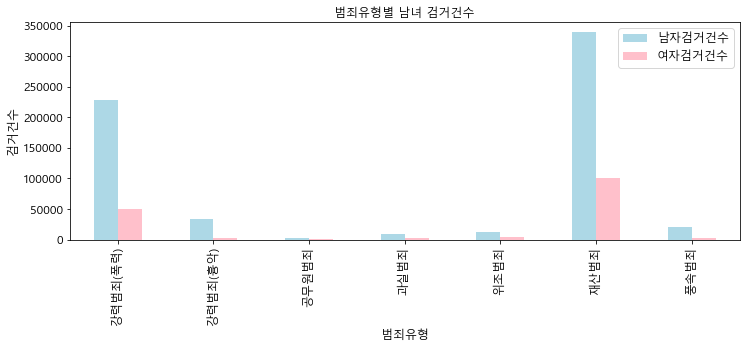

In [13]:
plt.rc('font',family='Malgun Gothic') #한글 폰트 설정
colors = ['lightblue','pink'] # 그래프 색상설정
ax = df3_group.plot(kind='bar',title='범죄유형별 남녀 검거건수',figsize=(12,4), legend=True, fontsize=12, color=colors) 
ax.set_xlabel('범죄유형', fontsize=12)
ax.set_ylabel('검거건수', fontsize=12)
ax.legend(['남자검거건수','여자검거건수'], fontsize=12) # 범례표시


In [14]:
df4=pd.DataFrame(df2,columns=['범죄대분류','발생건수','검거건수'])
df4

,범죄대분류,발생건수,검거건수
0,재산범죄,173650,106049
1,재산범죄,832,645
2,재산범죄,5585,4962
3,재산범죄,616,587
4,재산범죄,340925,234065
...,...,...,...
74,과실범죄,2846,2472
75,과실범죄,37,36
76,과실범죄,2491,2381
77,과실범죄,1113,1079


In [15]:
df4_group = df4.groupby('범죄대분류').sum()
df4_group

,발생건수,검거건수
범죄대분류,,
강력범죄(폭력),210241,197389
강력범죄(흉악),32812,31190
공무원범죄,3689,2030
과실범죄,8873,7839
위조범죄,15614,11620
재산범죄,659058,422267
풍속범죄,10951,10092


In [16]:
df4_group.loc[['강력범죄(폭력)','공무원범죄']]

,발생건수,검거건수
범죄대분류,,
강력범죄(폭력),210241,197389
공무원범죄,3689,2030


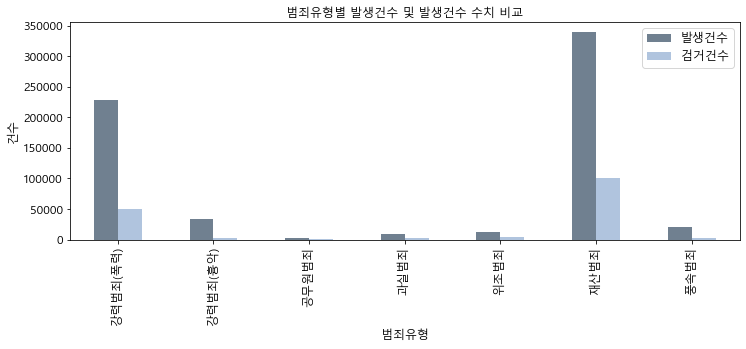

In [17]:
plt.rc('font',family='Malgun Gothic') #한글 폰트 설정
colors = ['slategrey','lightsteelblue']
ax = df3_group.plot(kind='bar',title='범죄유형별 발생건수 및 발생건수 수치 비교',figsize=(12,4), legend=True, fontsize=12,color=colors) 
ax.set_xlabel('범죄유형', fontsize=12)
ax.set_ylabel('건수', fontsize=12)
ax.legend(['발생건수','검거건수'], fontsize=12)

In [18]:
df2.corr()

,발생건수,발생비 (건/10만명),검거건수,발생건수대비 검거건수 (%),검거인원,남자검거인원,여자검거인원 (명),미상검거인원
발생건수,1.000000,0.999994,0.988624,-0.135909,0.953106,0.941552,0.977247,0.812404
발생비 (건/10만명),0.999994,1.000000,0.988557,-0.135839,0.952899,0.941315,0.977165,0.812102
검거건수,0.988624,0.988557,1.000000,-0.102364,0.985649,0.979200,0.993592,0.802189
발생건수대비 검거건수 (%),-0.135909,-0.135839,-0.102364,1.000000,-0.084652,-0.076248,-0.102536,-0.207828
검거인원,0.953106,0.952899,0.985649,-0.084652,1.000000,0.999088,0.990805,0.772858
남자검거인원,0.941552,0.941315,0.979200,-0.076248,0.999088,1.000000,0.984448,0.757346
여자검거인원 (명),0.977247,0.977165,0.993592,-0.102536,0.990805,0.984448,1.000000,0.786422
미상검거인원,0.812404,0.812102,0.802189,-0.207828,0.772858,0.757346,0.786422,1.000000


<AxesSubplot:>

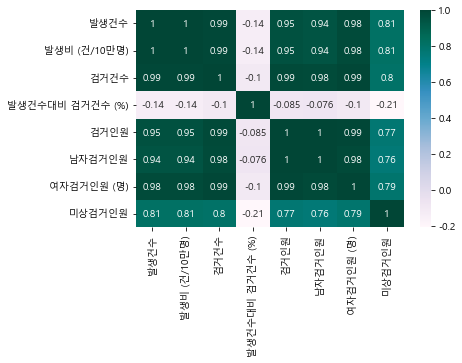

In [19]:
sns.heatmap(df2.corr(),cmap='PuBuGn', annot=True) #상관관계를 찾을 수 없음

In [20]:
df5=pd.DataFrame(df2,columns=['범죄중분류','남자검거인원','여자검거인원 (명)'])
df5

,범죄중분류,남자검거인원,여자검거인원 (명)
0,절도,69416,25558
1,불법사용,1066,68
2,침입절도,2583,218
3,장물,902,188
4,사기,183046,52520
...,...,...,...
74,과실치상,1799,1014
75,과실치사,39,12
76,업무상과실치상,3024,676
77,업무상과실치사,1843,301


In [21]:
df5['남자검거인원'].nlargest(3)
# 남자 검거인원에서 가장 수가 높은 Top 3 확인

4     183046
43    152683
0      69416
Name: 남자검거인원, dtype: int32

In [22]:
df5['여자검거인원 (명)'].nlargest(3)
# 여자 검거인원에서 가장 수가 높은 Top 3 확인

4     52520
43    34983
0     25558
Name: 여자검거인원 (명), dtype: int32

In [23]:
df5.loc[4]
# Largest로 뜬 4번 항목이 무엇인지 확인

범죄중분류             사기
남자검거인원        183046
여자검거인원 (명)     52520
Name: 4, dtype: object

In [24]:
male = df5[df5['범죄중분류']=='사기']['남자검거인원'].sum()
male
# 사기 내 남자검거인원 수 확인

183046

In [25]:
female = df5[df5['범죄중분류']=='사기']['여자검거인원 (명)'].sum()
female 
#  사기 내 여자검거인원 수 확인

52520

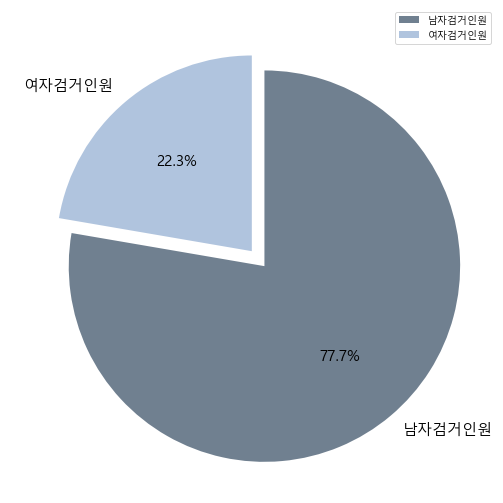

In [26]:
fig = plt.figure(figsize=(9,9))#캔버스 생성
fig.set_facecolor('white') #캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot()

explode = [0.1,0] #그래프 튀어나오게 하기
data = [male,female]
label = ['남자검거인원', '여자검거인원']
color_list = ['slategrey','lightsteelblue']

pie = plt.pie(data, explode = explode, labels=label, startangle=90, counterclock=False, autopct='%0.1f%%', 
        textprops={'fontsize':15}, colors=color_list) # 파이차트 시각화, 퍼센트 표시 & 텍스트, 시작점을 90도(degree)로 지정,
#시계 방향으로 그리기

plt.legend(pie[0],label) # 범례표시
plt.show()